In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Vehicle.csv")

In [3]:
df.isnull()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
842,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
843,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
844,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [4]:
df.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [5]:
temp = df.drop(columns=["compactness", "max.length_aspect_ratio", "max.length_rectangularity", "hollows_ratio", "class"])

In [6]:
temp.isnull().sum()

circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
dtype: int64

In [7]:
for columns in temp:
    df[columns] = df[columns].fillna(df[columns].mean())

In [8]:
df.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

In [9]:
X = df.drop(columns=["class"])
y = df["class"]

In [10]:
X

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,93,39.0,87.0,183.0,64.0,8,169.0,40.0,20.0,134,200.0,422.0,149.0,72.0,7.0,25.0,188.0,195
842,89,46.0,84.0,163.0,66.0,11,159.0,43.0,20.0,159,173.0,368.0,176.0,72.0,1.0,20.0,186.0,197
843,106,54.0,101.0,222.0,67.0,12,222.0,30.0,25.0,173,228.0,721.0,200.0,70.0,3.0,4.0,187.0,201
844,86,36.0,78.0,146.0,58.0,7,135.0,50.0,18.0,124,155.0,270.0,148.0,66.0,0.0,25.0,190.0,195


In [11]:
y

0      van
1      van
2      car
3      van
4      bus
      ... 
841    car
842    van
843    car
844    car
845    van
Name: class, Length: 846, dtype: object

In [12]:
le = LabelEncoder()
y = le.fit_transform(y)

In [13]:
y

array([2, 2, 1, 2, 0, 0, 0, 2, 2, 1, 2, 1, 0, 2, 0, 1, 2, 0, 1, 1, 0, 2,
       0, 0, 1, 2, 1, 1, 0, 1, 2, 1, 1, 1, 1, 2, 0, 2, 1, 0, 1, 2, 2, 1,
       1, 2, 2, 0, 2, 1, 1, 1, 1, 0, 0, 2, 1, 2, 1, 2, 1, 1, 2, 0, 0, 1,
       0, 1, 2, 0, 1, 1, 1, 1, 2, 1, 1, 1, 0, 0, 0, 0, 2, 1, 0, 0, 2, 2,
       0, 1, 1, 1, 1, 2, 0, 1, 1, 0, 1, 0, 0, 2, 2, 2, 0, 1, 1, 1, 0, 0,
       2, 2, 1, 1, 2, 2, 1, 1, 0, 0, 1, 2, 2, 1, 2, 2, 0, 0, 2, 0, 1, 1,
       1, 2, 1, 2, 2, 2, 1, 2, 1, 0, 1, 0, 1, 1, 2, 0, 1, 2, 1, 0, 1, 1,
       2, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 0, 2, 0, 2, 0,
       1, 0, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 2, 1, 0, 1, 0, 1, 0,
       0, 0, 2, 1, 1, 1, 2, 2, 1, 0, 0, 1, 1, 2, 0, 0, 1, 1, 1, 1, 0, 2,
       1, 2, 0, 0, 1, 2, 1, 2, 1, 1, 2, 1, 0, 1, 2, 2, 0, 0, 1, 0, 1, 1,
       0, 1, 2, 2, 0, 1, 1, 1, 2, 1, 2, 0, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       1, 0, 0, 1, 2, 2, 0, 1, 2, 2, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 2, 1,
       0, 2, 1, 1, 2, 2, 0, 2, 0, 0, 0, 1, 1, 0, 1,

In [14]:
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_standardized = (X - X_mean) / X_std

In [15]:
cov_matrix = np.cov(X_standardized, rowvar=False)

In [16]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

In [17]:
eigenvalues

array([9.40828822e+00, 3.01605477e+00, 1.90347881e+00, 1.18027268e+00,
       9.17174067e-01, 5.39279825e-01, 3.58566463e-01, 2.21661730e-01,
       1.60036194e-01, 9.17140864e-02, 6.65751851e-02, 4.59556829e-02,
       3.54023825e-02, 3.08801865e-03, 2.67096104e-02, 9.23357029e-03,
       1.74414127e-02, 2.03690624e-02])

In [18]:
eigenvectors

array([[ 2.75259459e-01,  1.27010856e-01,  1.19874162e-01,
        -7.83109159e-02, -6.93062475e-02,  1.44650156e-01,
         4.53755811e-01,  5.64713964e-01,  4.83554183e-01,
         2.61221731e-01, -4.64498989e-02,  1.34446607e-02,
        -1.59324486e-01,  6.56773512e-03, -5.98448138e-02,
        -1.62328028e-03, -6.05262978e-02, -3.85955867e-04],
       [ 2.93392341e-01, -1.26217125e-01,  2.51835016e-02,
        -1.87525528e-01,  8.50186000e-02, -3.00733370e-01,
        -2.48092973e-01,  1.79295222e-01,  1.45395937e-02,
        -9.75432534e-02, -2.55383379e-03, -1.97520615e-01,
        -1.46192222e-02, -7.98780902e-04,  3.96666736e-01,
         7.62595458e-02, -3.40071641e-01, -5.85708475e-01],
       [ 3.04556452e-01,  7.26862818e-02,  5.60058748e-02,
         7.07959698e-02, -4.07236757e-02, -1.38488042e-01,
         7.27989653e-02, -4.36047225e-01,  1.67573501e-01,
         2.08494817e-01, -7.05942549e-01, -6.37015997e-03,
         2.33090309e-01, -3.71748194e-03, -1.51057100e

In [19]:
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

In [20]:
k = 2
top_k_eigenvectors = eigenvectors[:, :k]

In [21]:
X_pca = np.dot(X_standardized, top_k_eigenvectors)

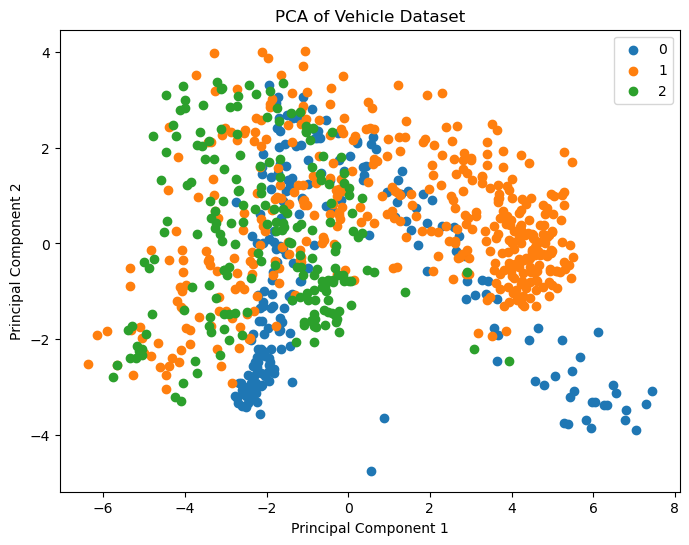

In [22]:
plt.figure(figsize=(8, 6))
for class_value in np.unique(y):
    plt.scatter(
        X_pca[y == class_value, 0],
        X_pca[y == class_value, 1],
        label=class_value
    )
plt.title("PCA of Vehicle Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

In [23]:
explained_variance = eigenvalues / np.sum(eigenvalues)
print("Explained Variance (First 2 Components):", explained_variance[:2])
print("Cumulative Explained Variance:", np.sum(explained_variance[:2]))

Explained Variance (First 2 Components): [0.52206485 0.16736054]
Cumulative Explained Variance: 0.6894253893220285
